In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
mean = np.array([5.0, 6.0]) 
cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
data = np.random.multivariate_normal(mean, cov, 8000) 
data

array([[4.98958416, 6.1838738 ],
       [5.09121749, 5.78873666],
       [5.2417338 , 6.89820973],
       ...,
       [4.51945798, 5.10138453],
       [6.06476456, 6.62694027],
       [5.86061999, 6.84708512]])

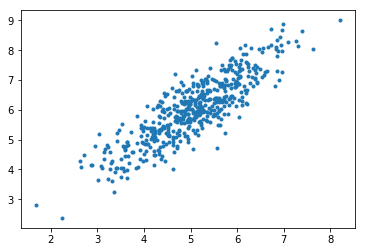

In [3]:
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 

In [4]:
data = np.hstack((np.ones((data.shape[0], 1)), data)) 

In [5]:
split_factor = 0.90
split = int(split_factor * data.shape[0]) 
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 

In [6]:
X_train.shape[0]

7200

In [7]:
X_test.shape[0]

800

In [8]:
def hypothesis(X, theta): 
    return np.dot(X, theta) 

In [9]:
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 

In [10]:
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 

In [11]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

In [12]:
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

In [13]:
theta, error_list = gradientDescent(X_train, y_train) 

In [14]:
theta[0]

array([0.79044039])

In [15]:
theta[1:]

array([[1.02703138]])

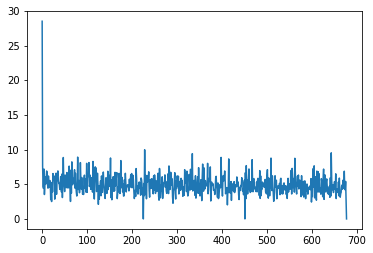

In [16]:
plt.plot(error_list)

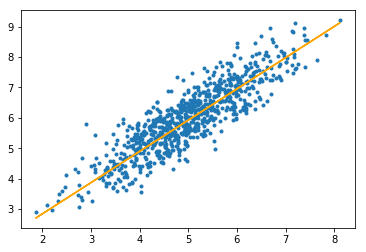

In [17]:
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 